In [2]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.font_manager

%matplotlib inline

reference: https://github.com/LeBron-Jian/MachineLearningNote/blob/master/OneClassSVM/OneClassSVM_RBF.py

generate some data

In [23]:
X = 0.3 * np.random.randn(300,2)
X_train = np.r_[X+2, X-2]
X_test = np.r_[X+2, X-2]
# create some outliers
X_outliers = np.random.uniform(low = 0.01, high = 4, size = (30,2))

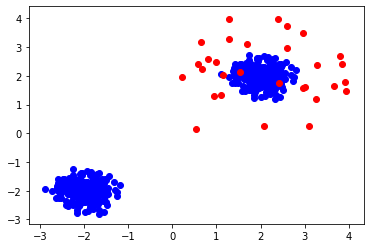

In [24]:
plt.figure(1)
plt.scatter(X_train[:,0], X_train[:,1], color = 'b')
plt.scatter(X_outliers[:,0], X_outliers[:,1], color = 'r')

fit model

In [29]:
nu_parameter = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001, 0.000005, 0.000001]
outlier_error = []

for nu in nu_parameter:
    clf = svm.OneClassSVM(nu = nu, kernel = 'rbf', gamma = 'auto')
    clf.fit(X_train)
    Y_train = clf.predict(X_train)
    Y_test = clf.predict(X_test)
    Y_outliers = clf.predict(X_outliers)
    train_error= Y_train[Y_train == -1].size
    test_error = Y_test[Y_test == -1].size
    outlier_error.append((Y_outliers[Y_outliers == 1].size)/X_outliers.size)

print(outlier_error)
'''
print("train error is {}%".format(100*(train_error/X_train.size)))
print("test error is {}%".format(100*(test_error/X_test.size)))
print("outlier detectio error is {}%".format(100*(outlier_error/X_outliers.size)))
'''

[0.0, 0.03333333333333333, 0.03333333333333333, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.03333333333333333, 0.05, 0.0]


'\nprint("train error is {}%".format(100*(train_error/X_train.size)))\nprint("test error is {}%".format(100*(test_error/X_test.size)))\nprint("outlier detectio error is {}%".format(100*(outlier_error/X_outliers.size)))\n'

In [26]:
best_nu = nu_parameter[np.argmin(outlier_error)]
best_clf = svm.OneClassSVM(nu = best_nu, kernel='rbf', gamma = 'auto')
best_clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

make some plots:

In [27]:
xx, yy = np.meshgrid(np.linspace(-5,5,500), np.linspace(-5,5,500))
Z = best_clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

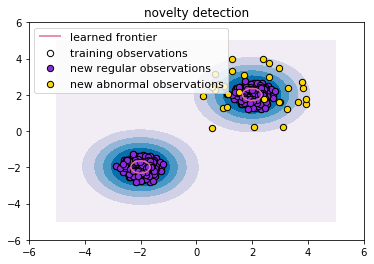

In [28]:
plt.title("novelty detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(),0,7), cmap = plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
s =40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s, edgecolors='k')
 
plt.axis('tight')
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", 'training observations',
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))